<center><img src="ignaz_semmelweis_1860_small.jpeg"></center>

Hungarian physician Dr. Ignaz Semmelweis worked at the Vienna General Hospital with childbed fever patients. Childbed fever is a deadly disease affecting women who have just given birth, and in the early 1840s, as many as 10% of the women giving birth died from it at the Vienna General Hospital. Dr.Semmelweis discovered that it was the contaminated hands of the doctors delivering the babies, and on **June 1st, 1847**, he decreed that everyone should wash their hands, an unorthodox and controversial request; nobody in Vienna knew about bacteria.

You will reanalyze the data that made Semmelweis discover the importance of handwashing and its impact on the hospital and the number of deaths.

The data is stored as two CSV files within the `data` folder.

`data/yearly_deaths_by_clinic.csv` contains the number of women giving birth at the two clinics at the Vienna General Hospital between the years 1841 and 1846.

| Column | Description |
|--------|-------------|
|`year`  |Years (1841-1846)|
|`births`|Number of births|
|`deaths`|Number of deaths|
|`clinic`|Clinic 1 or clinic 2|

`data/monthly_deaths.csv` contains data from 'Clinic 1' of the hospital where most deaths occurred.

| Column | Description |
|--------|-------------|
|`date`|Date (YYYY-MM-DD)
|`births`|Number of births|
|`deaths`|Number of deaths|

In [133]:
# Imported libraries
import pandas as pd
import matplotlib.pyplot as plt

In [134]:
first_data = pd.read_csv('data/yearly_deaths_by_clinic.csv')

In [135]:
clinic1 = pd.read_csv('data/monthly_deaths.csv')

In [136]:
first_data

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [137]:
first_data['ratio']= (first_data['deaths'] / first_data['births']) * 100
first_data

,year,births,deaths,clinic,ratio
0,1841,3036,237,clinic 1,7.806324
1,1842,3287,518,clinic 1,15.759051
2,1843,3060,274,clinic 1,8.954248
3,1844,3157,260,clinic 1,8.235667
4,1845,3492,241,clinic 1,6.901489
5,1846,4010,459,clinic 1,11.446384
6,1841,2442,86,clinic 2,3.521704
7,1842,2659,202,clinic 2,7.596841
8,1843,2739,164,clinic 2,5.987587
9,1844,2956,68,clinic 2,2.300406


In [138]:
clinic_summary = first_data.groupby('clinic')[['births', 'deaths']].sum().reset_index()
clinic_summary['ratio'] = (clinic_summary['deaths'] / clinic_summary['births']) * 100
print(clinic_summary)

     clinic  births  deaths     ratio
0  clinic 1   20042    1989  9.924159
1  clinic 2   17791     691  3.883986


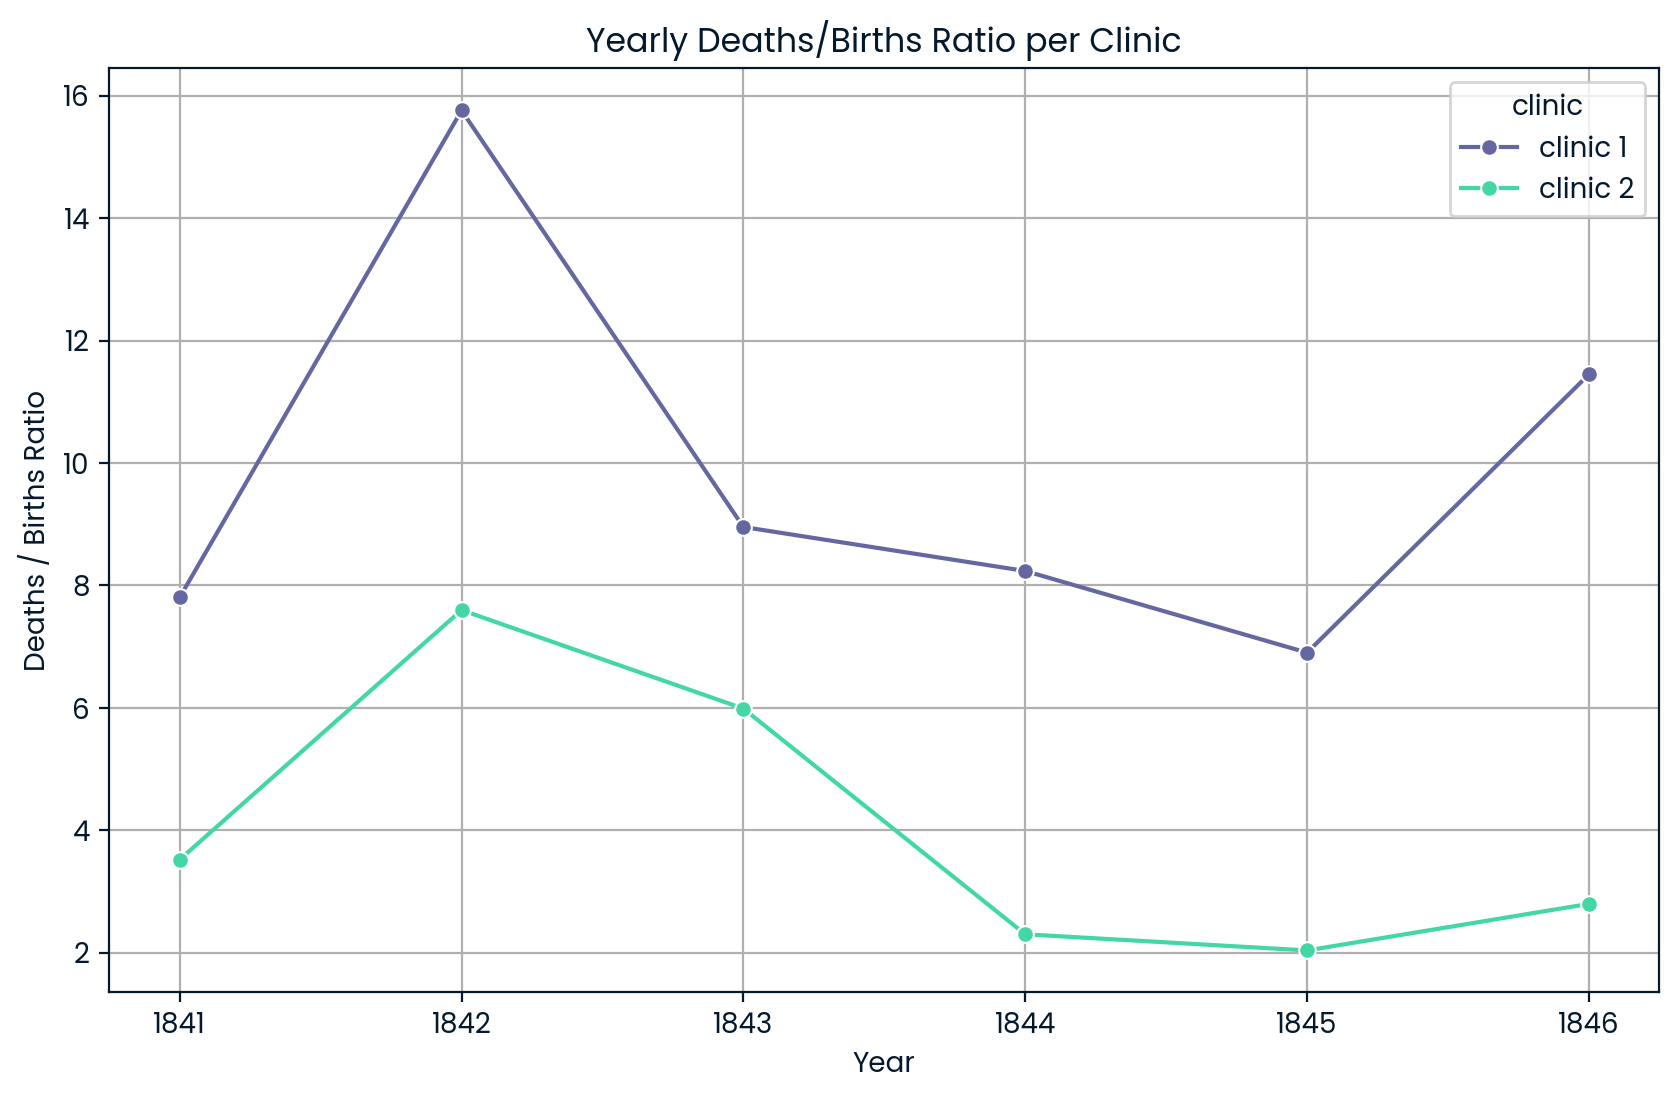

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.lineplot(data=first_data, x='year', y='ratio', hue='clinic', marker='o')
plt.title('Yearly Deaths/Births Ratio per Clinic')
plt.ylabel('Deaths / Births Ratio')
plt.xlabel('Year')
plt.grid(True)
plt.show()


In [140]:
clinic_year_sum = first_data.groupby(['clinic','year'])['ratio'].max().reset_index()
print(clinic_year_sum)

      clinic  year      ratio
0   clinic 1  1841   7.806324
1   clinic 1  1842  15.759051
2   clinic 1  1843   8.954248
3   clinic 1  1844   8.235667
4   clinic 1  1845   6.901489
5   clinic 1  1846  11.446384
6   clinic 2  1841   3.521704
7   clinic 2  1842   7.596841
8   clinic 2  1843   5.987587
9   clinic 2  1844   2.300406
10  clinic 2  1845   2.036409
11  clinic 2  1846   2.797017


In [141]:
idx = clinic_year_sum.groupby('clinic')['ratio'].idxmax()
highest_ratio_per_clinic = clinic_year_sum.loc[idx].reset_index(drop=True)

In [142]:
highest_year = int(highest_ratio_per_clinic.loc[highest_ratio_per_clinic['ratio'].idxmax(), 'year'])
print(highest_year)

1842


In [143]:
# Handwashing was introduced June 1st 1847-01-06

In [144]:
clinic1['ratio'] = (clinic1['deaths'] / clinic1['births'])
clinic1.head()

,date,births,deaths,ratio
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


In [145]:
# Add year month column
clinic1['date'] = pd.to_datetime(clinic1['date'])
clinic1['year_month'] = clinic1['date'].dt.to_period('M')
clinic1['year_month'] = clinic1['year_month'].astype(str)

clinic1.head()

,date,births,deaths,ratio,year_month
0,1841-01-01,254,37,0.145669,1841-01
1,1841-02-01,239,18,0.075314,1841-02
2,1841-03-01,277,12,0.043321,1841-03
3,1841-04-01,255,4,0.015686,1841-04
4,1841-05-01,255,2,0.007843,1841-05


In [146]:
print(clinic1[['year_month', 'ratio']].head())

  year_month     ratio
0    1841-01  0.145669
1    1841-02  0.075314
2    1841-03  0.043321
3    1841-04  0.015686
4    1841-05  0.007843


In [147]:
# Handwashing started on 1st June 1847
clinic1['handwashing_started'] = clinic1['date'] >= pd.to_datetime('1847-06-01')
clinic1.head()

,date,births,deaths,ratio,year_month,handwashing_started
0,1841-01-01,254,37,0.145669,1841-01,False
1,1841-02-01,239,18,0.075314,1841-02,False
2,1841-03-01,277,12,0.043321,1841-03,False
3,1841-04-01,255,4,0.015686,1841-04,False
4,1841-05-01,255,2,0.007843,1841-05,False


In [148]:
clinic1_extra = clinic1

In [149]:
clinic1_handwash = clinic1_extra.groupby('handwashing_started')[['births','deaths']].sum().reset_index()
clinic1_handwash['ratio'] = (clinic1_handwash['deaths'] / clinic1_handwash['births'])
print(clinic1_handwash)

   handwashing_started  births  deaths     ratio
0                False   19571    2060  0.105258
1                 True    6595     142  0.021531


In [150]:
monthly_summary = clinic1_handwash[['handwashing_started','ratio']]
print(monthly_summary)

   handwashing_started     ratio
0                False  0.105258
1                 True  0.021531


In [151]:
# pre-handwashing
pre_hw = clinic1.loc[clinic1['handwashing_started'] == False, 'ratio']

# post-handwashing
post_hw = clinic1.loc[clinic1['handwashing_started'] == True, 'ratio']

In [152]:
import numpy as np

n_iterations = 10000  # number of bootstrap samples
boot_means = []

for _ in range(n_iterations):
    pre_sample = pre_hw.sample(frac=1, replace=True)
    post_sample = post_hw.sample(frac=1, replace=True)
    
    # difference in means (post - pre)
    diff = post_sample.mean() - pre_sample.mean()
    boot_means.append(diff)

boot_means = np.array(boot_means)


In [153]:
boot_means

array([-0.08361882, -0.09296107, -0.08927647, ..., -0.07207776,
       -0.07736626, -0.07656757])

In [154]:
confidence_interval = pd.Series(np.percentile(boot_means, [2.5, 97.5]), index=['2.5%', '97.5%'])
print(confidence_interval)


2.5%    -0.101472
97.5%   -0.067174
dtype: float64


We are 95% confident that the true reduction in deaths proportion is between 6.7% and 10.1%

In simple words: handwashing likely reduced deaths by about 7–10%